In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
train_path = '/home/bigdata/Desktop/Keras Tutorial/cat-and-dog/train'
test_path = '/home/bigdata/Desktop/Keras Tutorial/cat-and-dog/test'
valid_path = '/home/bigdata/Desktop/Keras Tutorial/cat-and-dog/valid'

In [4]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes = ['dog','cat'],batch_size = 5)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes = ['dog','cat'],batch_size = 5)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes = ['dog','cat'],batch_size = 5)

Found 28 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [11]:
# Write code here from video
def plots(ims,figsize = (12,6),row = 1,interp = False,title=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if ims.shape[-1] !=3 :
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize)
    col = len(ims)//row if len(ims)%2 == 0 else len(ims)//row +1
    for i in range(len(ims)):
        sp = f.add_subplot(row,col,i+1)
        sp.axis('Off')
        if title is not None:
            sp.set_title(title[i],fontsize=16)
        plt.imshow(ims[i],interpolation=None if interp else 'none')

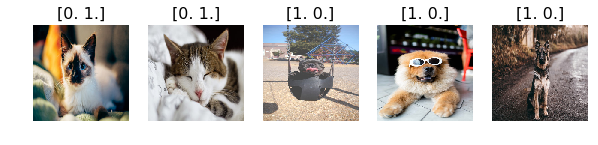

In [12]:
imgs,labels = next(train_batches)
plots(imgs,title=labels)

In [13]:
train_batches.class_indices

{'dog': 0, 'cat': 1}

In [14]:
# Build CNN Model
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    Conv2D(32,(3,3),activation = 'relu'),
    Conv2D(32,(3,3),activation = 'relu'),
    Flatten(),
    Dense(2,activation='softmax')
])

In [15]:
model.compile(Adam(lr=0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [16]:
model.fit_generator(train_batches,steps_per_epoch = 4,validation_data = valid_batches,validation_steps = 4,epochs= 5,verbose=2)

Epoch 1/5
 - 5s - loss: 7.0580 - acc: 0.5622 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 3s - loss: 5.6413 - acc: 0.6500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 3s - loss: 8.6680 - acc: 0.4622 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 4s - loss: 6.4472 - acc: 0.6000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 3s - loss: 7.2128 - acc: 0.5525 - val_loss: 8.0590 - val_acc: 0.5000


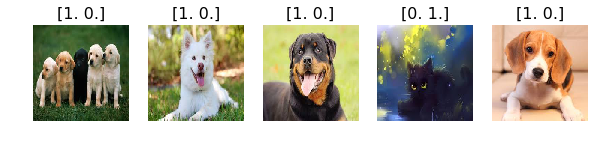

In [19]:
# Predict
test_imgs,test_labels = next(test_batches)
plots(test_imgs,title = test_labels)

In [20]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 0., 1.], dtype=float32)

In [21]:
prediction = model.predict_generator(test_batches,steps = 1,verbose = 0)

In [22]:
prediction

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [23]:
cm = confusion_matrix(test_labels,prediction[:,0])

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1 0]
 [4 0]]


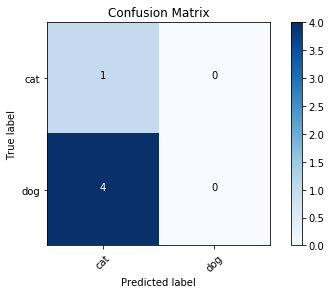

In [25]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title = "Confusion Matrix")

In [26]:
# Build VGG 16 Model
vgg16_model = keras.applications.vgg16.VGG16()

In [27]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [28]:
type(vgg16_model)

keras.engine.training.Model

In [29]:
# AS Not a sequential Convert into sequential
model_vgg16 = Sequential()
for layer in vgg16_model.layers:
    model_vgg16.add(layer)

In [30]:
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [31]:
# Remove last year of prediction as it classify 1000 classes
# convert into 2 class prediction
model_vgg16.layers.pop()

In [32]:
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [33]:
model_vgg16.add(Dense(2,activation = 'softmax'))

In [34]:
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [35]:
model_vgg16.compile(Adam(lr = 0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_vgg16.fit_generator(train_batches,steps_per_epoch = 4,validation_data = valid_batches,validation_steps= 4,epochs = 1,verbose=2)

Epoch 1/5


In [1]:
# Predict Using VGG16
# Predict
test_imgs,test_labels = next(test_batches)
plots(test_imgs,title = test_labels)


NameError: name 'test_batches' is not defined

In [2]:
test_labels = test_labels[:,0]
test_labels

NameError: name 'test_labels' is not defined

In [3]:
predictions = model_vgg16.predict_generator(test_batches,step = 1,verbose=0)

NameError: name 'model_vgg16' is not defined

In [ ]:
cm = confusion_matrix(test_labels,prediction[:,0])

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title = "Confusion Matrix")